In [1]:
import pandas as pd
import pydataset as ds
from sklearn.linear_model import LinearRegression

### Instructions

Use the `pydataset` library to get a dataset called "diamonds". We will be using this data set for all of the models that we build in this exercise. Get the dataset, see how many records are in it, and look at the first few records.

In [2]:
dia = ds.data("diamonds")
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dia.plot.scatter(x = "carat", y = "price", alpha = 0.05, figsize = (16,9))

#### Single Feature Model
---

In [4]:
# Build a model that can predict price given only the carat size of a diamond in the set.
model_single = LinearRegression()
model_single.fit(X = dia[["carat"]], y = dia.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# Use this model to determine how much of a given diamond's price can be determined
# by its carat size.
model_single.score(X = dia[["carat"]], y = dia.price)

0.8493305264354857

In [6]:
# Approximately how much increase in price is a single caret worth based on this model?
print(model_single.coef_)

[7756.42561797]


#### Multi-Feature Model
---

In [7]:
# Build a model that predicts price based on the measurement (x, y, z), depth, and table of 
# each diamond.
model_multi = LinearRegression()
model_multi.fit(X = dia[["x","y","z","depth","table"]], y = dia.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# How much of the price can be explianed by these factors in a linear way.
model_multi.score(X = dia[["x","y","z","depth","table"]], y = dia.price)

0.7845908795144827

In [9]:
# What was the average amount of error the model made? (Keep in mind error can be positive or negative, 
# and we can use absolute value to take this into account.)
dia["predicted"] = model_multi.predict(X=dia[["x","y","z","depth","table"]])
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,predicted
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1515.997139
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-2222.112473
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-2016.950383
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-980.753875
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-545.987513


In [10]:
dia["model_error"] = abs(dia.price - dia.predicted)
dia.model_error.mean()

1360.4012459512935

In [11]:
# Which cuts had highest and lowest error?
(dia
 .groupby("cut").mean()
 .sort_values("model_error", ascending = False)
 .drop(columns = ["carat","depth","table","price","x","y","z","predicted"])
)

,model_error
cut,
Fair,1776.013442
Premium,1519.003478
Very Good,1379.269822
Good,1339.932635
Ideal,1221.940379


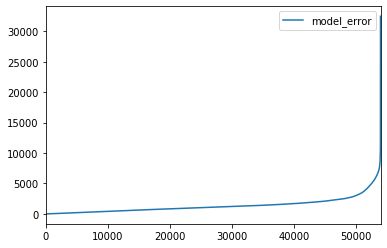

In [29]:
dia.sort_values("model_error").reset_index()[["model_error"]].plot()

#### Data Subset Models
---

In [44]:
# Build two separate linear models for Ideal and Premium cut diamonds. Base your models on
# predicting price from carat, depth, and table.
# Hint: consider getting a new copy of the diamonds data from pydataset.
dia2 = ds.data("diamonds")
dia2_ideal = dia2[dia2.cut == "Ideal"]
dia2_premium = dia2[dia2.cut =="Premium"]
print(f"Ideal:{len(dia2_ideal)}")
print(f"Premium:{len(dia2_premium)}")

Ideal:21551
Premium:13791


In [14]:
model_ideal = LinearRegression()
model_ideal.fit(X = dia2_ideal[["carat", "depth","table"]], y = dia2_ideal.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model_premium = LinearRegression()
model_premium.fit(X = dia2_premium[["carat", "depth","table"]], y = dia2_premium.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Which model performs better? How much better?
print(model_ideal.score(X = dia2_ideal[["carat", "depth","table"]], y = dia2_ideal.price))
print(model_premium.score(X = dia2_premium[["carat", "depth","table"]], y = dia2_premium.price))

0.8673505996417938
0.8556807667008979


#### Feature Engineering - computing a new variable
---

In [56]:
# Get a fresh copy of diamonds and compute a new column named "volume" that is computed
# from the x,y,z measurements of each diamond.
dia3 = ds.data("diamonds")
dia3["volume"] = dia3.x * dia3.y * dia3.z
dia3["surface"] = dia3.x * dia3.y
dia3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,surface
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,15.7210
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,14.9376
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,16.4835
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,17.7660
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,18.8790


In [57]:
# Build separate models to model the three measurements in aggregate against price,
# and the newly computer single volume measurement.
model_xyz = LinearRegression()
model_xyz.fit(X = dia3[["x","y","z"]], y = dia3.price)

model_agg = LinearRegression()
model_agg.fit(X=dia3[["volume"]], y=dia3.price)

model_all = LinearRegression()
model_all.fit(X = dia3[["x","y","z","volume"]], y = dia3.price)

model_xy = LinearRegression()
model_xy.fit(X = dia3[["x","y","z","volume", "surface"]], y = dia3.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Is there a difference in the accuracy of the models? To what would this be attributed?
print(model_xyz.score(X = dia3[["x", "y","z"]], y = dia3.price))
print(model_agg.score(X = dia3[["volume"]], y = dia3.price))
print(model_all.score(X = dia3[["x","y","z","volume"]], y = dia3.price))
print(model_xy.score(X = dia3[["x","y","z","volume", "surface"]], y = dia3.price))

0.7825425402126274
0.8142978513633491
0.8465935119893122
0.8565944316034795


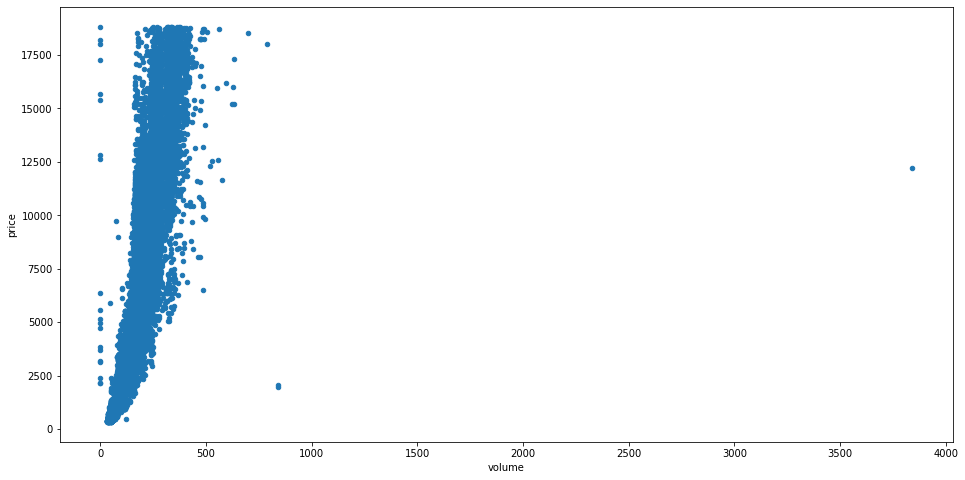

In [49]:
dia3.plot.scatter(x="volume", y="price", figsize= (16,8))